
# Proyek Predictive Analytics: Prediksi Harga Saham (Snapshot NIFTY 500) dengan Model Regresi
- Nama: Yosua Samuel Edlyn Sinaga
- Email: yosuas282@gmail.com
- ID Dicoding: yosuasinaga

## 1. Import Library


In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

Menjalankan kode untuk mengimpor pustaka yang dibutuhkan untuk pemrosesan data dan pembuatan model.

## 2. Data Loading
- Memuat dataset nifty_500.csv.
- Pastikan file ini sudah diunggah ke sesi Google Colab Anda.

In [266]:
file_path_stock = 'nifty_500.csv'
try:
    df = pd.read_csv(file_path_stock)
    print(f"Dataset '{file_path_stock}' berhasil dimuat.")
    print(f"Jumlah baris awal: {len(df)}, Jumlah kolom awal: {len(df.columns)}")
except FileNotFoundError:
    print(f"ERROR: File '{file_path_stock}' tidak ditemukan. Pastikan sudah diupload.")
    raise
except Exception as e:
    print(f"Error saat memuat dataset: {e}")
    raise

Dataset 'nifty_500.csv' berhasil dimuat.
Jumlah baris awal: 501, Jumlah kolom awal: 17


Menjalankan kode untuk memuat dataset 'nifty_500.csv' dan menampilkan jumlah baris serta kolom pada dataset.



In [267]:
print("Lima baris pertama dataset:")
df.head()

Lima baris pertama dataset:


,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


Menjalankan kode untuk menampilkan lima baris pertama dari dataset agar dapat melihat contoh data.

In [268]:
print("Informasi dataset:")
df.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 

Menjalankan kode untuk menampilkan informasi umum tentang dataset, termasuk tipe data dan jumlah non-null di setiap kolom.



In [269]:
print("Nama kolom dalam dataset:")
df.columns.tolist()

Nama kolom dalam dataset:


['Company Name',
 'Symbol',
 'Industry',
 'Series',
 'Open',
 'High',
 'Low',
 'Previous Close',
 'Last Traded Price',
 'Change',
 'Percentage Change',
 'Share Volume',
 'Value (Indian Rupee)',
 '52 Week High',
 '52 Week Low',
 '365 Day Percentage Change',
 '30 Day Percentage Change']

Menjalankan kode untuk menampilkan nama kolom dalam dataset.

## 3. EDA (Exploratory Data Analysis)
- Melakukan analisis eksplorasi data awal untuk memahami dataset lebih baik.
- Kita akan memeriksa tipe data, statistik deskriptif, nilai yang hilang,
outlier, distribusi target, dan korelasi antar fitur.
- Data akan dibersihkan seperlunya khusus untuk keperluan EDA ini.

In [270]:
print("Informasi Awal Dataset:")
df.info()

print("\nStatistik Deskriptif Awal:")
print(df.describe(include='all'))

Informasi Awal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High              

Menjalankan kode untuk menampilkan informasi awal dari dataset dan statistik deskriptif, termasuk analisis untuk kolom yang mungkin mengandung string '-'.



In [271]:
print("Cek Nilai Null Awal per Kolom:")
print(df.isnull().sum())

Cek Nilai Null Awal per Kolom:
Company Name                 0
Symbol                       0
Industry                     0
Series                       0
Open                         0
High                         0
Low                          0
Previous Close               0
Last Traded Price            0
Change                       0
Percentage Change            0
Share Volume                 0
Value (Indian Rupee)         0
52 Week High                 0
52 Week Low                  0
365 Day Percentage Change    0
30 Day Percentage Change     0
dtype: int64


- Hasil di atas akan menunjukkan jumlah nilai null per kolom.
- Penanganan nilai null yang lebih detail akan dilakukan pada tahap Data Preparation.

In [272]:
# Kita buat salinan agar df asli tidak berubah sebelum Data Preparation utama
df_eda = df.copy()

# Definisikan kolom yang seharusnya numerik berdasarkan pemahaman kita tentang dataset NIFTY 500
# Ini adalah kolom yang akan kita gunakan untuk plot numerik dan korelasi di EDA
# (Kolom target juga dimasukkan di sini untuk pembersihan)
cols_to_make_numeric_for_eda = [
    'Open', 'High', 'Low', 'Previous Close', 'Last Traded Price', 'Change',
    'Percentage Change', 'Share Volume', 'Value (Indian Rupee)',
    '52 Week High', '52 Week Low', '365 Day Percentage Change', '30 Day Percentage Change'
]
# Pastikan hanya memproses kolom yang ada di df_eda
cols_to_make_numeric_for_eda = [col for col in cols_to_make_numeric_for_eda if col in df_eda.columns]

print("Membersihkan Kolom Numerik untuk Keperluan EDA pada df_eda")
for col in cols_to_make_numeric_for_eda:
    if df_eda[col].dtype == 'object': # Hanya proses jika tipe datanya objek
        original_hyphens = (df_eda[col] == '-').sum()
        if original_hyphens > 0:
            print(f"- Kolom '{col}': Ditemukan {original_hyphens} nilai '-' (strip), akan diganti dengan NaN.")
            df_eda[col] = df_eda[col].replace('-', np.nan)

        original_empty_strings = (df_eda[col] == '').sum()
        if original_empty_strings > 0:
            print(f"- Kolom '{col}': Ditemukan {original_empty_strings} string kosong, akan diganti dengan NaN.")
            df_eda[col] = df_eda[col].replace('', np.nan)

    # Konversi ke numerik, paksa error menjadi NaN
    df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce')

    nan_count_after_coerce = df_eda[col].isnull().sum()
    if nan_count_after_coerce > 0:
        # Untuk EDA, mengisi dengan median adalah strategi yang umum agar statistik dan plot tidak error
        median_val = df_eda[col].median()
        if pd.isna(median_val): # Jika median juga NaN (misal semua nilai di kolom itu NaN atau non-numerik)
            df_eda[col].fillna(0, inplace=True) # Isi dengan 0 jika median tidak bisa dihitung
            print(f"- Kolom '{col}': {nan_count_after_coerce} NaN (setelah coerce/replace) diisi dengan 0 (karena median NaN).")
        else:
            df_eda[col].fillna(median_val, inplace=True)
            print(f"- Kolom '{col}': {nan_count_after_coerce} NaN (setelah coerce/replace) diisi dengan median ({median_val:.2f}).")

print("\nPembersihan kolom numerik untuk EDA selesai.")

Membersihkan Kolom Numerik untuk Keperluan EDA pada df_eda
- Kolom 'Change': Ditemukan 3 nilai '-' (strip), akan diganti dengan NaN.
- Kolom 'Change': 5 NaN (setelah coerce/replace) diisi dengan median (0.75).
- Kolom 'Percentage Change': Ditemukan 3 nilai '-' (strip), akan diganti dengan NaN.
- Kolom 'Percentage Change': 3 NaN (setelah coerce/replace) diisi dengan median (0.46).
- Kolom '365 Day Percentage Change': Ditemukan 44 nilai '-' (strip), akan diganti dengan NaN.
- Kolom '365 Day Percentage Change': 44 NaN (setelah coerce/replace) diisi dengan median (-11.06).
- Kolom '30 Day Percentage Change': Ditemukan 3 nilai '-' (strip), akan diganti dengan NaN.
- Kolom '30 Day Percentage Change': 3 NaN (setelah coerce/replace) diisi dengan median (-6.01).

Pembersihan kolom numerik untuk EDA selesai.


<ipython-input-272-57a5b91e3875>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda[col].fillna(median_val, inplace=True)


- Kode ini membersihkan kolom-kolom numerik yang ditentukan dalam df_eda.
- String '-' dan string kosong diubah menjadi NaN.
- Semua nilai dikonversi paksa ke tipe numerik (nilai yang tidak valid menjadi NaN).
- Nilai NaN yang tersisa kemudian diisi dengan median kolom (atau 0 jika median tidak bisa dihitung).
- Tujuannya adalah menyiapkan data untuk analisis EDA (statistik dan visualisasi) agar berjalan tanpa error tipe data.

In [273]:
print("Statistik Deskriptif Setelah Pembersihan untuk EDA:")
print(df_eda[cols_to_make_numeric_for_eda].describe())

Statistik Deskriptif Setelah Pembersihan untuk EDA:
               Open          High           Low  Previous Close  \
count    501.000000    501.000000    501.000000      501.000000   
mean    1525.904491   1553.804990   1504.042415     1528.061277   
std     4466.627117   4576.377692   4435.492332     4477.209376   
min        6.750000      6.950000      6.700000        6.850000   
25%      215.300000    221.550000    210.600000      217.200000   
50%      551.100000    569.100000    547.000000      554.750000   
75%     1404.500000   1421.250000   1396.850000     1411.700000   
max    70300.000000  72500.000000  70300.000000    70800.900000   

       Last Traded Price      Change  Percentage Change  Share Volume  \
count         501.000000  501.000000         501.000000  5.010000e+02   
mean         1536.925449    4.553892           0.387575  2.580350e+06   
std          4532.004734   53.178520           2.139292  9.407021e+06   
min             6.800000 -543.650000         -14.830

- Sekarang describe() hanya akan menampilkan kolom yang berhasil dikonversi ke numerik
- dan telah diisi NaN-nya (jika ada) untuk keperluan EDA.
- Kita pilih kolom yang sama dengan cols_to_make_numeric_for_eda untuk konsistensi

Deteksi Outlier dengan Boxplot (untuk beberapa fitur numerik kunci):


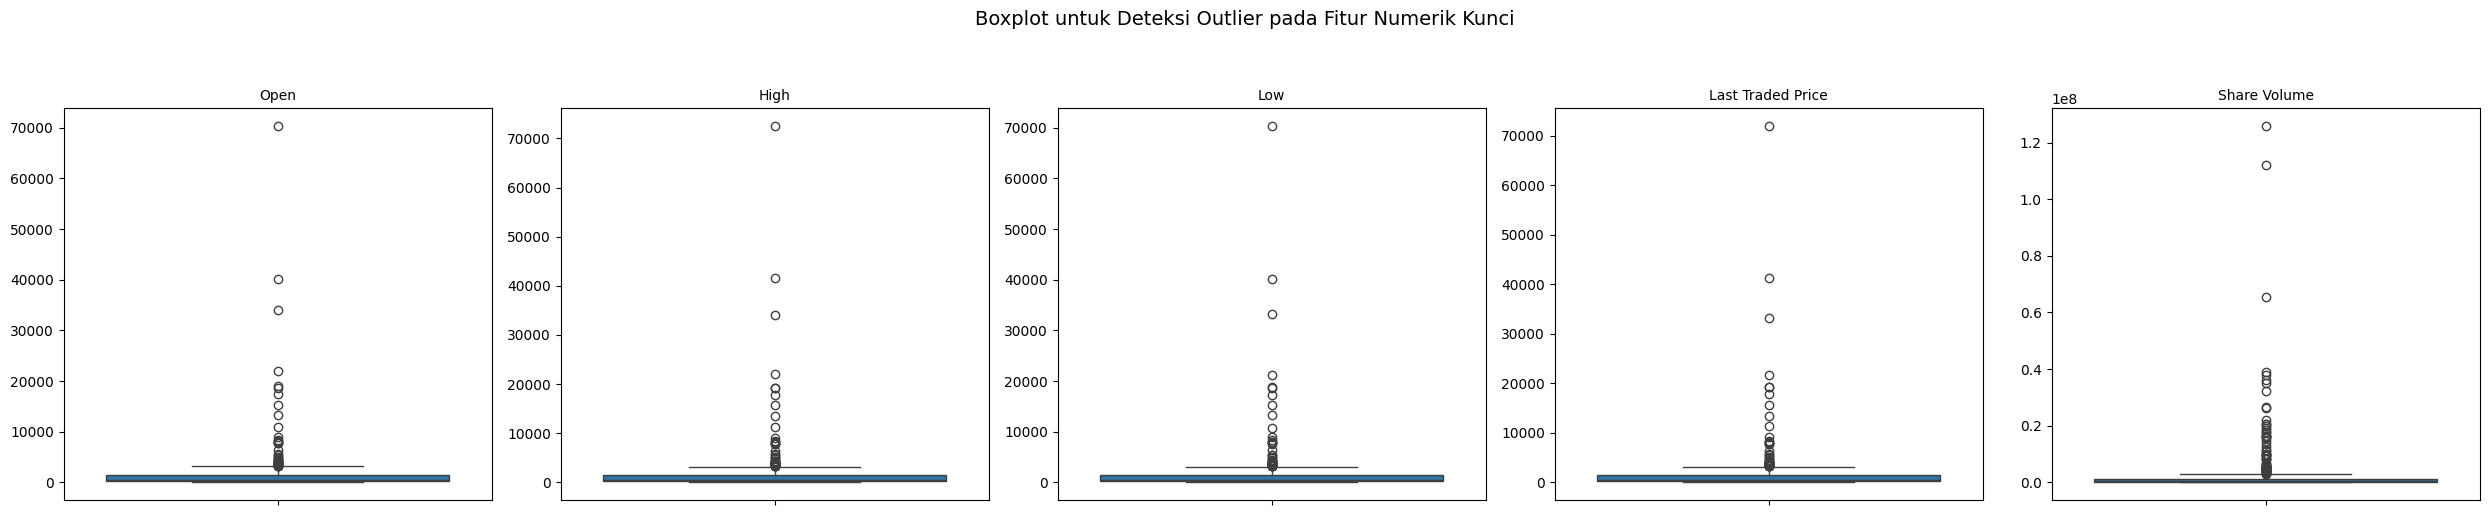

In [274]:
print("Deteksi Outlier dengan Boxplot (untuk beberapa fitur numerik kunci):")
# Pilih beberapa fitur numerik kunci untuk boxplot agar tidak terlalu ramai
# Kita gunakan kolom yang sudah dibersihkan di df_eda
boxplot_cols = ['Open', 'High', 'Low', 'Last Traded Price', 'Share Volume']
# Filter hanya kolom yang ada di df_eda dan sudah numerik
boxplot_cols_existing = [col for col in boxplot_cols if col in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[col])]

if boxplot_cols_existing:
    num_plots = len(boxplot_cols_existing)
    plt.figure(figsize=(max(5 * num_plots, 15), 5))

    for i, col_name in enumerate(boxplot_cols_existing):
        plt.subplot(1, num_plots, i + 1)
        sns.boxplot(y=df_eda[col_name])
        plt.title(col_name, fontsize=10)
        plt.ylabel('')
    plt.suptitle("Boxplot untuk Deteksi Outlier pada Fitur Numerik Kunci", fontsize=14, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("Tidak ada kolom valid yang ditemukan untuk membuat boxplot.")

- Kode ini bertujuan untuk mendeteksi outlier pada beberapa fitur numerik kunci (boxplot_cols) dari DataFrame df_eda (yang diasumsikan sudah dibersihkan sebagian).
- Membuat serangkaian boxplot (satu untuk setiap fitur) yang ditampilkan berdampingan dalam satu figure.
- Sebelum plotting, dilakukan penyaringan untuk memastikan hanya kolom yang ada dan benar-benar numerik yang digunakan.
- Ukuran figure disesuaikan secara dinamis berdasarkan jumlah plot yang akan ditampilkan.
- Setiap boxplot diberi judul sesuai nama kolomnya.

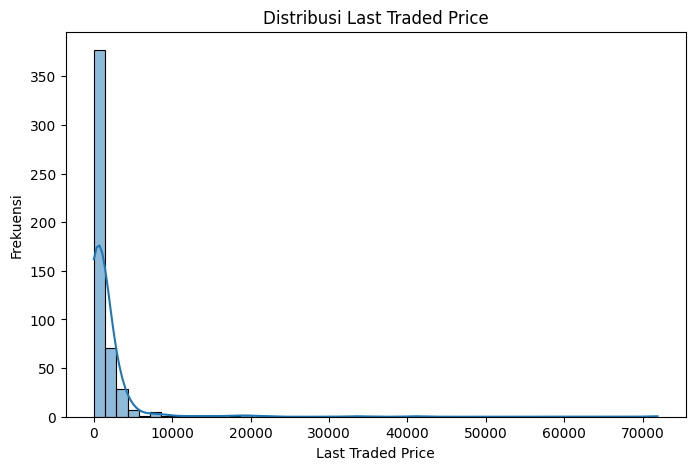

Skewness dari 'Last Traded Price': 10.21
Distribusi 'Last Traded Price' terlihat miring ke kanan (right-skewed).


In [275]:
target_col_name_eda = 'Last Traded Price'

if target_col_name_eda in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):
    plt.figure(figsize=(8, 5))
    sns.histplot(df_eda[target_col_name_eda], kde=True, bins=50)
    plt.title(f"Distribusi {target_col_name_eda}")
    plt.xlabel(target_col_name_eda)
    plt.ylabel("Frekuensi")
    plt.show()

    skewness = df_eda[target_col_name_eda].skew()
    print(f"Skewness dari '{target_col_name_eda}': {skewness:.2f}")
    if skewness > 1:
        print(f"Distribusi '{target_col_name_eda}' terlihat miring ke kanan (right-skewed).")
    elif skewness < -1:
        print(f"Distribusi '{target_col_name_eda}' terlihat miring ke kiri (left-skewed).")
    else:
        print(f"Distribusi '{target_col_name_eda}' terlihat relatif simetris.")
else:
    print(f"Kolom target '{target_col_name_eda}' tidak valid atau tidak ditemukan di df_eda untuk plot distribusi.")

- Kode ini bertujuan untuk memvisualisasikan distribusi dari variabel target (Last Traded Price) menggunakan histogram dengan kurva KDE.
- Sebelum plotting, dilakukan pengecekan untuk memastikan kolom target ada dan numerik.
- Setelah plot ditampilkan, kode menghitung dan menampilkan nilai skewness untuk mengukur asimetri distribusi, diikuti dengan interpretasi singkat (miring ke kanan, kiri, atau simetris).

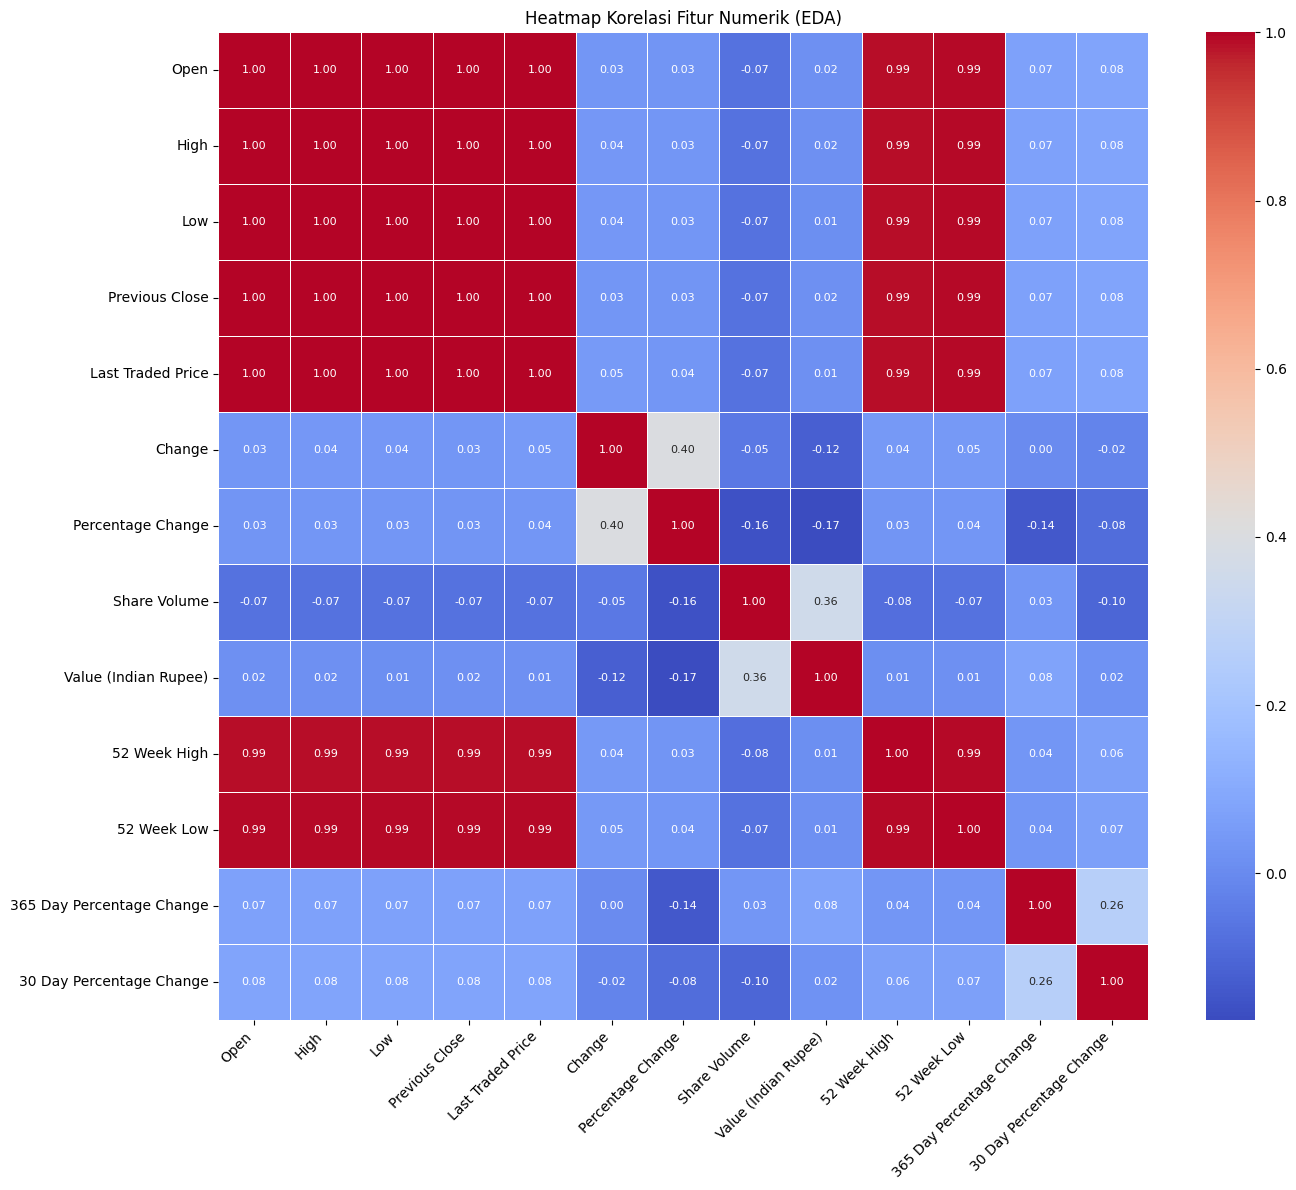

Korelasi fitur numerik dengan target 'Last Traded Price' (diurutkan):
Last Traded Price            1.000000
High                         0.999973
Low                          0.999957
Previous Close               0.999890
Open                         0.999832
52 Week Low                  0.994556
52 Week High                 0.989987
30 Day Percentage Change     0.078694
365 Day Percentage Change    0.069566
Change                       0.045967
Percentage Change            0.035953
Value (Indian Rupee)         0.014145
Share Volume                -0.072868
Name: Last Traded Price, dtype: float64


In [276]:
# Hanya menggunakan kolom yang sudah pasti numerik di df_eda (yaitu, cols_to_make_numeric_for_eda yang sudah diproses)
numerical_cols_for_corr_eda = [col for col in cols_to_make_numeric_for_eda if col in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[col])]

if numerical_cols_for_corr_eda:
    correlation_matrix_eda = df_eda[numerical_cols_for_corr_eda].corr()
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation_matrix_eda, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title("Heatmap Korelasi Fitur Numerik (EDA)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    if target_col_name_eda in correlation_matrix_eda.columns:
        print(f"Korelasi fitur numerik dengan target '{target_col_name_eda}' (diurutkan):")
        print(correlation_matrix_eda[target_col_name_eda].sort_values(ascending=False))
else:
    print("Tidak ada fitur numerik valid yang ditemukan di df_eda untuk heatmap korelasi.")

Kode ini menghitung dan menampilkan heatmap korelasi fitur numerik dalam `df_eda`. Jika kolom target ada, korelasi dengan target juga ditampilkan. Jika tidak ada kolom numerik valid, akan muncul pesan pemberitahuan.


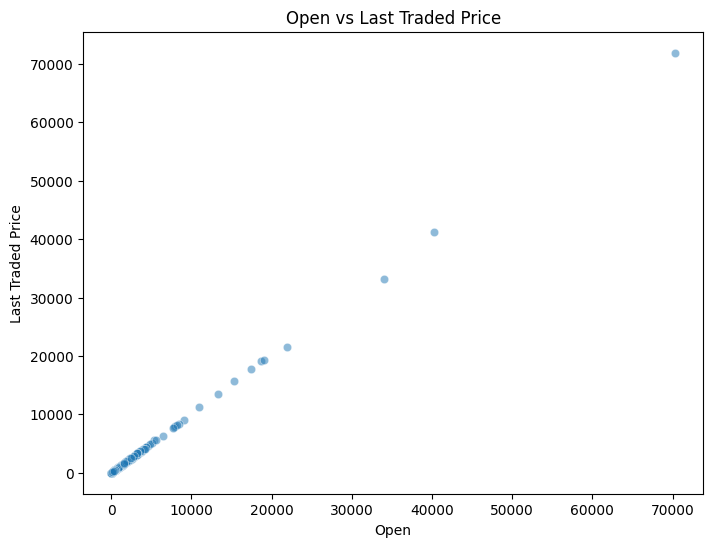

Korelasi antara 'Open' dan 'Last Traded Price': 1.00


In [277]:
# Menggunakan kolom yang sudah dibersihkan di df_eda
feature_for_bivariate_num_example = 'Open'
if feature_for_bivariate_num_example in df_eda.columns and \
   target_col_name_eda in df_eda.columns and \
   pd.api.types.is_numeric_dtype(df_eda[feature_for_bivariate_num_example]) and \
   pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature_for_bivariate_num_example, y=target_col_name_eda, data=df_eda, alpha=0.5)
    plt.title(f"{feature_for_bivariate_num_example} vs {target_col_name_eda}")
    plt.show()

    corr_val_bivar = df_eda[feature_for_bivariate_num_example].corr(df_eda[target_col_name_eda])
    print(f"Korelasi antara '{feature_for_bivariate_num_example}' dan '{target_col_name_eda}': {corr_val_bivar:.2f}")
else:
    print(f"Kolom '{feature_for_bivariate_num_example}' atau target '{target_col_name_eda}' tidak valid untuk analisis bivariat numerik.")

Kode ini membuat scatter plot dan menghitung korelasi antara dua fitur numerik dalam `df_eda`, yaitu `Open` dan `Last Traded Price` dengan hasil korelasi 1.00.

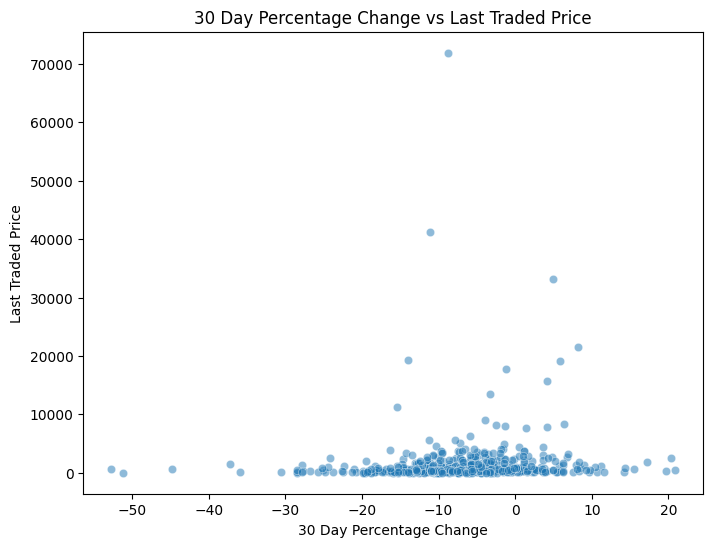

Korelasi antara '30 Day Percentage Change' dan 'Last Traded Price': 0.08


In [278]:
# Menggunakan kolom yang sudah dibersihkan di df_eda
feature_for_bivariate_num_example = '30 Day Percentage Change'
if feature_for_bivariate_num_example in df_eda.columns and \
   target_col_name_eda in df_eda.columns and \
   pd.api.types.is_numeric_dtype(df_eda[feature_for_bivariate_num_example]) and \
   pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature_for_bivariate_num_example, y=target_col_name_eda, data=df_eda, alpha=0.5)
    plt.title(f"{feature_for_bivariate_num_example} vs {target_col_name_eda}")
    plt.show()

    corr_val_bivar = df_eda[feature_for_bivariate_num_example].corr(df_eda[target_col_name_eda])
    print(f"Korelasi antara '{feature_for_bivariate_num_example}' dan '{target_col_name_eda}': {corr_val_bivar:.2f}")
else:
    print(f"Kolom '{feature_for_bivariate_num_example}' atau target '{target_col_name_eda}' tidak valid untuk analisis bivariat numerik.")

Kode ini membuat scatter plot dan menghitung korelasi antara dua fitur numerik dalam `df_eda`, yaitu `30 Day Percentage Change` dan `Last Traded Price` dengan hasil korelasi 0.08.

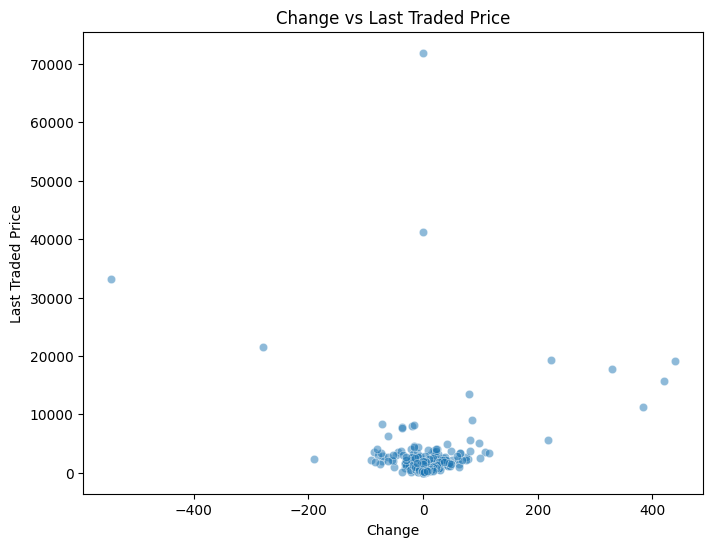

Korelasi antara 'Change' dan 'Last Traded Price': 0.05


In [279]:
# Menggunakan kolom yang sudah dibersihkan di df_eda
feature_for_bivariate_num_example = 'Change'
if feature_for_bivariate_num_example in df_eda.columns and \
   target_col_name_eda in df_eda.columns and \
   pd.api.types.is_numeric_dtype(df_eda[feature_for_bivariate_num_example]) and \
   pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature_for_bivariate_num_example, y=target_col_name_eda, data=df_eda, alpha=0.5)
    plt.title(f"{feature_for_bivariate_num_example} vs {target_col_name_eda}")
    plt.show()

    corr_val_bivar = df_eda[feature_for_bivariate_num_example].corr(df_eda[target_col_name_eda])
    print(f"Korelasi antara '{feature_for_bivariate_num_example}' dan '{target_col_name_eda}': {corr_val_bivar:.2f}")
else:
    print(f"Kolom '{feature_for_bivariate_num_example}' atau target '{target_col_name_eda}' tidak valid untuk analisis bivariat numerik.")

Kode ini membuat scatter plot dan menghitung korelasi antara dua fitur numerik dalam `df_eda`, yaitu `Change` dan `Last Traded Price` dengan hasil korelasi 0.05.

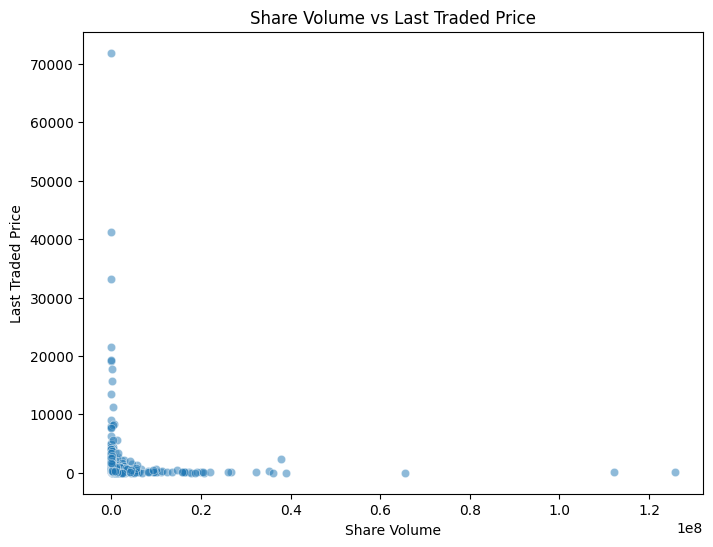

Korelasi antara 'Share Volume' dan 'Last Traded Price': -0.07


In [280]:
# Menggunakan kolom yang sudah dibersihkan di df_eda
feature_for_bivariate_num_example = 'Share Volume'
if feature_for_bivariate_num_example in df_eda.columns and \
   target_col_name_eda in df_eda.columns and \
   pd.api.types.is_numeric_dtype(df_eda[feature_for_bivariate_num_example]) and \
   pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature_for_bivariate_num_example, y=target_col_name_eda, data=df_eda, alpha=0.5)
    plt.title(f"{feature_for_bivariate_num_example} vs {target_col_name_eda}")
    plt.show()

    corr_val_bivar = df_eda[feature_for_bivariate_num_example].corr(df_eda[target_col_name_eda])
    print(f"Korelasi antara '{feature_for_bivariate_num_example}' dan '{target_col_name_eda}': {corr_val_bivar:.2f}")
else:
    print(f"Kolom '{feature_for_bivariate_num_example}' atau target '{target_col_name_eda}' tidak valid untuk analisis bivariat numerik.")

Kode ini membuat scatter plot dan menghitung korelasi antara dua fitur numerik dalam `df_eda`, yaitu `Share Volume` dan `Last Traded Price` dengan hasil korelasi -0.07.

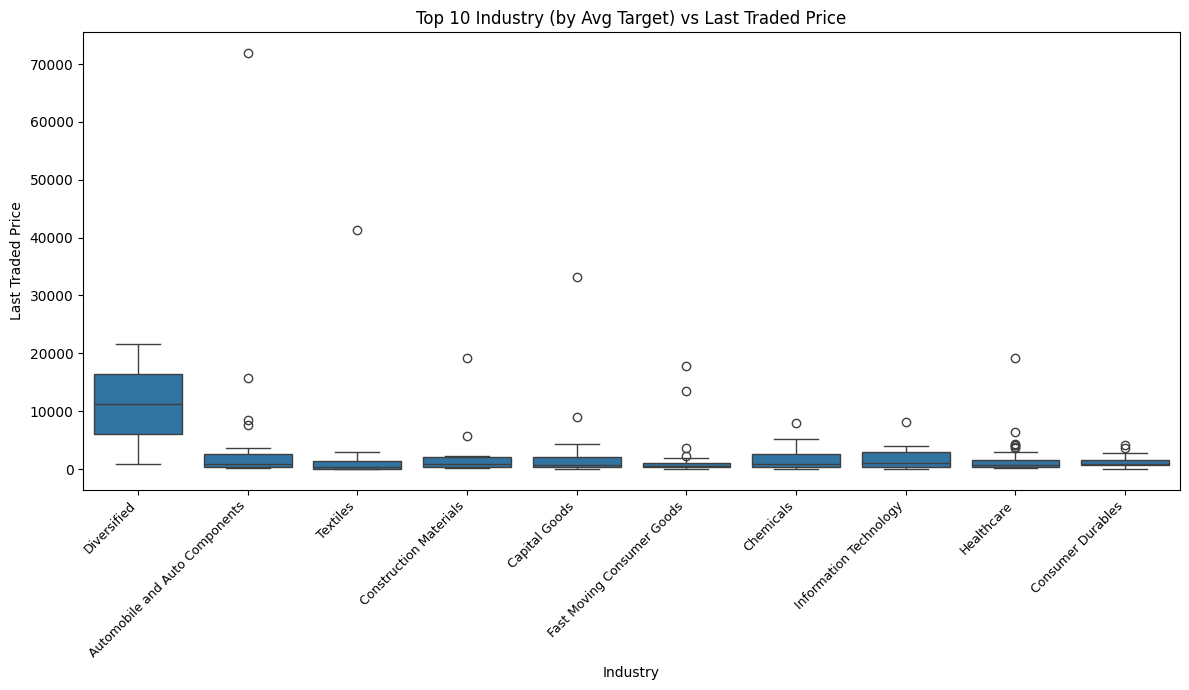

Rata-rata 'Last Traded Price' berdasarkan 'Industry' (Top 5 berdasarkan mean LTP):
Industry
Diversified                       11261.400000
Automobile and Auto Components     4759.355556
Textiles                           4756.170000
Construction Materials             2673.757692
Capital Goods                      2009.814583
Name: Last Traded Price, dtype: float64


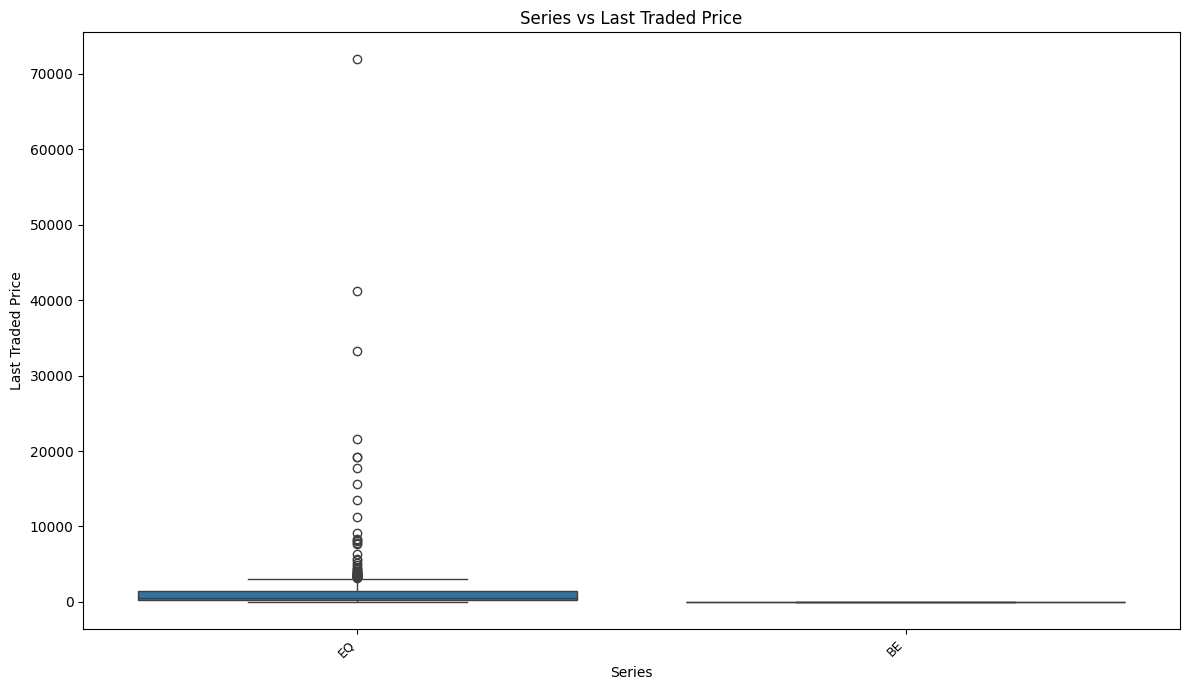

Rata-rata 'Last Traded Price' berdasarkan 'Series' (Top 5 berdasarkan mean LTP):
Series
EQ    1539.9562
BE      21.5500
Name: Last Traded Price, dtype: float64


In [281]:
# Fitur kategorikal dari dataset Anda (nama kolom asli)
categorical_features_for_bivariate_eda = ['Industry', 'Series']
# Filter hanya yang ada di df_eda
categorical_features_for_bivariate_eda = [col for col in categorical_features_for_bivariate_eda if col in df_eda.columns]

for cat_col_name_eda in categorical_features_for_bivariate_eda:
    if target_col_name_eda in df_eda.columns and pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):

        top_n_categories_eda = 10 # Jumlah kategori teratas yang ingin ditampilkan
        num_unique_cat = df_eda[cat_col_name_eda].nunique()

        if num_unique_cat > top_n_categories_eda:
            # Dapatkan N kategori teratas berdasarkan rata-rata target (harga)
            top_categories_by_target_mean_eda = df_eda.groupby(cat_col_name_eda)[target_col_name_eda].mean().nlargest(top_n_categories_eda).index
            df_eda_top_cat_plot = df_eda[df_eda[cat_col_name_eda].isin(top_categories_by_target_mean_eda)]
            plot_title_cat = f'Top {top_n_categories_eda} {cat_col_name_eda} (by Avg Target) vs {target_col_name_eda}'
            data_to_plot_cat = df_eda_top_cat_plot
            order_plot_cat = top_categories_by_target_mean_eda
        else:
            plot_title_cat = f'{cat_col_name_eda} vs {target_col_name_eda}'
            data_to_plot_cat = df_eda
            # Urutkan berdasarkan rata-rata target untuk plot yang lebih rapi
            order_plot_cat = df_eda.groupby(cat_col_name_eda)[target_col_name_eda].mean().sort_values(ascending=False).index

        plt.figure(figsize=(12, 7))
        sns.boxplot(x=cat_col_name_eda, y=target_col_name_eda, data=data_to_plot_cat, order=order_plot_cat)
        plt.title(plot_title_cat)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.tight_layout()
        plt.show()

        print(f"Rata-rata '{target_col_name_eda}' berdasarkan '{cat_col_name_eda}' (Top 5 berdasarkan mean LTP):")
        print(df_eda.groupby(cat_col_name_eda)[target_col_name_eda].mean().nlargest(5))
    else:
        print(f"Kolom '{cat_col_name_eda}' atau target '{target_col_name_eda}' tidak valid untuk analisis bivariat kategorikal.")

Kode ini menganalisis kolom kategorikal terhadap kolom target dengan menampilkan boxplot dan rata-rata target per kategori. Jika jumlah kategori lebih dari 10, hanya 10 kategori teratas yang ditampilkan. Kode juga mencetak 5 kategori teratas berdasarkan rata-rata target.


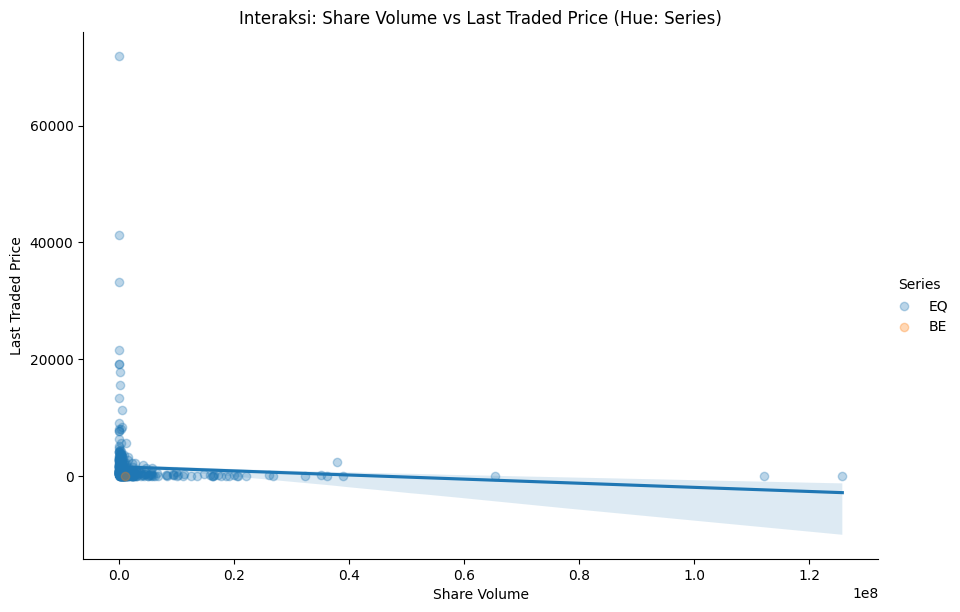

In [282]:
feature1_interaction_eda = 'Share Volume'
feature_hue_interaction_eda = 'Series'

if feature1_interaction_eda in df_eda.columns and \
   feature_hue_interaction_eda in df_eda.columns and \
   target_col_name_eda in df_eda.columns and \
   pd.api.types.is_numeric_dtype(df_eda[feature1_interaction_eda]) and \
   pd.api.types.is_numeric_dtype(df_eda[target_col_name_eda]):

    num_unique_hue = df_eda[feature_hue_interaction_eda].nunique()
    if num_unique_hue > 0 and num_unique_hue < 10: # Batasi jumlah hue agar plot tidak terlalu ramai

        # Batasi jumlah data poin untuk lmplot agar tidak terlalu berat jika datanya besar
        # Ambil sampel jika data terlalu besar
        sample_df_for_lmplot = df_eda.sample(n=min(1000, len(df_eda)), random_state=42) if len(df_eda) > 1000 else df_eda

        # lmplot membuat figure sendiri
        sns.lmplot(x=feature1_interaction_eda, y=target_col_name_eda, hue=feature_hue_interaction_eda,
                   data=sample_df_for_lmplot, aspect=1.5, height=6, scatter_kws={'alpha':0.3})
        plt.title(f"Interaksi: {feature1_interaction_eda} vs {target_col_name_eda} (Hue: {feature_hue_interaction_eda})")
        plt.show()
    else:
        print(f"Kolom '{feature_hue_interaction_eda}' memiliki terlalu banyak kategori unik ({num_unique_hue}) atau tidak ada data untuk plot interaksi yang jelas.")
else:
    print(f"Kolom untuk plot interaksi ('{feature1_interaction_eda}', '{feature_hue_interaction_eda}', atau '{target_col_name_eda}') tidak valid atau tidak ditemukan.")


Kode ini membuat visualisasi interaksi antara dua fitur numerik dengan `lmplot`, menggunakan kategori sebagai `hue`. Jika kolom valid dan jumlah kategori pada `hue` antara 1 dan 10, plot akan ditampilkan. Jika data terlalu besar, akan diambil sampel 1000 data. Pesan kesalahan muncul jika kolom tidak valid atau kategori `hue` terlalu banyak.


## 3 Data Preparation
Tahap ini mencakup:
- Definisi nama kolom yang akan digunakan.
- Pembersihan data (penanganan nilai null, konversi tipe data).
- Feature Engineering (pembuatan target dan fitur).
- One-Hot Encoding untuk fitur kategorikal.
- Pembagian data menjadi set latih dan uji.
- Penskalaan fitur.

In [283]:
if 'df' not in globals() or df is None:
    print("ERROR: DataFrame 'df' belum dimuat. Jalankan Sel Data Loading (Sel 3 & 4) terlebih dahulu.")
    raise NameError("DataFrame 'df' tidak didefinisikan.")

company_name_col = 'Company Name'
symbol_col = 'Symbol'
industry_col = 'Industry'
series_col = 'Series'
open_col = 'Open'
high_col = 'High'
low_col = 'Low'
prev_close_col = 'Previous Close'
target_col_name = 'Last Traded Price'
change_col = 'Change'
percentage_change_col = 'Percentage Change'
volume_col = 'Share Volume'
value_col = 'Value (Indian Rupee)'
week_52_high_col = '52 Week High'
week_52_low_col = '52 Week Low'
day_365_change_col = '365 Day Percentage Change'
day_30_change_col = '30 Day Percentage Change'

# Daftar fitur numerik yang akan digunakan (sebelum cleaning detail)
numerical_feature_candidates = [
    open_col, high_col, low_col, prev_close_col, change_col, percentage_change_col,
    volume_col, value_col, week_52_high_col, week_52_low_col,
    day_365_change_col, day_30_change_col
]
# Daftar fitur kategorikal yang akan di-encode
categorical_feature_candidates = [industry_col, series_col]

# Pastikan semua kandidat kolom ada di df
numerical_features = [col for col in numerical_feature_candidates if col in df.columns]
categorical_features = [col for col in categorical_feature_candidates if col in df.columns]

if target_col_name not in df.columns:
    raise ValueError(f"Kolom target '{target_col_name}' tidak ditemukan dalam DataFrame.")
print(f"Kolom target (Y): '{target_col_name}'")
print(f"Fitur numerik kandidat: {numerical_features}")
print(f"Fitur kategorikal kandidat: {categorical_features}")

Kolom target (Y): 'Last Traded Price'
Fitur numerik kandidat: ['Open', 'High', 'Low', 'Previous Close', 'Change', 'Percentage Change', 'Share Volume', 'Value (Indian Rupee)', '52 Week High', '52 Week Low', '365 Day Percentage Change', '30 Day Percentage Change']
Fitur kategorikal kandidat: ['Industry', 'Series']


Kode ini memeriksa apakah DataFrame `df` ada dan memastikan kolom target serta fitur numerik dan kategorikal valid. Jika ada masalah, akan muncul pesan kesalahan. Jika valid, menampilkan kolom target dan fitur yang digunakan.


In [284]:
# Buat salinan df untuk diproses agar df asli tetap utuh
df_prep = df.copy()

# Hapus baris jika target ('Last Traded Price') adalah NaN
df_prep.dropna(subset=[target_col_name], inplace=True)
print(f"Jumlah baris setelah menghapus NaN pada kolom target '{target_col_name}': {len(df_prep)}")

if df_prep.empty:
    raise ValueError("Dataset menjadi kosong setelah menghapus NaN pada kolom target. Tidak ada data untuk diproses.")

Jumlah baris setelah menghapus NaN pada kolom target 'Last Traded Price': 501


Kode ini membuat salinan DataFrame `df` menjadi `df_prep` untuk menjaga DataFrame asli tetap utuh. Kemudian, menghapus baris dengan nilai NaN pada kolom target dan memeriksa apakah DataFrame kosong setelah proses tersebut. Jika kosong, akan muncul pesan kesalahan.


In [285]:
# TARGET (y)
y = df_prep[target_col_name].copy()

# FITUR NUMERIK (X_numerical)
# Ambil kolom numerik dan lakukan pembersihan paksa
X_numerical = df_prep[numerical_features].copy() # numerical_features sudah difilter yang ada di df_prep
print(f"\nMemproses {len(X_numerical.columns)} fitur numerik...")

for col in X_numerical.columns:
    if X_numerical[col].dtype == 'object': # Jika tipe data objek, coba ganti '-' dan ''
        original_hyphens = (X_numerical[col] == '-').sum()
        if original_hyphens > 0:
            # print(f"  Kolom '{col}': {original_hyphens} nilai '-' diganti NaN.")
            X_numerical[col] = X_numerical[col].replace('-', np.nan)
        original_empty_strings = (X_numerical[col] == '').sum()
        if original_empty_strings > 0:
            # print(f"  Kolom '{col}': {original_empty_strings} string kosong diganti NaN.")
            X_numerical[col] = X_numerical[col].replace('', np.nan)

    X_numerical[col] = pd.to_numeric(X_numerical[col], errors='coerce') # Konversi ke numerik, error jadi NaN

    nan_count = X_numerical[col].isnull().sum()
    if nan_count > 0:
        median_val = X_numerical[col].median()
        if pd.isna(median_val):
            X_numerical[col].fillna(0, inplace=True)
            # print(f"  Kolom '{col}': {nan_count} NaN diisi dengan 0 (karena median juga NaN).")
        else:
            X_numerical[col].fillna(median_val, inplace=True)
            # print(f"  Kolom '{col}': {nan_count} NaN diisi dengan median ({median_val:.2f}).")

print("Pembersihan dan konversi fitur numerik selesai.")
# X_numerical.info() # Cek tipe data akhir jika perlu

# FITUR KATEGORIKAL (X_categorical_encoded)
X_categorical_encoded = pd.DataFrame(index=X_numerical.index) # Inisialisasi dengan index yang akan selaras
if categorical_features: # categorical_features sudah difilter yang ada di df_prep
    df_cat_for_encoding = df_prep.loc[X_numerical.index, categorical_features].copy() # Ambil baris yang sama dengan X_numerical

    for cat_col in categorical_features:
        if df_cat_for_encoding[cat_col].isnull().any():
            mode_val = df_cat_for_encoding[cat_col].mode()
            mode_val = mode_val[0] if not mode_val.empty else "UNKNOWN"
            df_cat_for_encoding[cat_col].fillna(mode_val, inplace=True)
            # print(f"  NaN di kolom kategorikal '{cat_col}' diisi dengan modus '{mode_val}'.")

    temp_encoded = pd.get_dummies(df_cat_for_encoding,
                                  columns=categorical_features,
                                  prefix=categorical_features,
                                  dummy_na=False)
    X_categorical_encoded = temp_encoded # Assign
    print(f"One-Hot Encoding untuk {categorical_features} selesai. Jumlah fitur hasil encoding: {X_categorical_encoded.shape[1]}")
else:
    print("Tidak ada fitur kategorikal yang valid untuk di-encode.")

# Gabungkan Fitur Numerik dan Kategorikal (Encoded) untuk membentuk X
# Reset index untuk memastikan konkatenasi yang aman dan benar berdasarkan posisi
X_numerical = X_numerical.reset_index(drop=True)
if not X_categorical_encoded.empty:
    X_categorical_encoded = X_categorical_encoded.reset_index(drop=True)
y = y.reset_index(drop=True)

if not X_categorical_encoded.empty:
    X = pd.concat([X_numerical, X_categorical_encoded], axis=1)
else:
    X = X_numerical.copy()

print("\nFitur (X) dan Target (y) telah final:")
print("Contoh X.head():")
print(X.head())
print(f"Dimensi X: {X.shape}")
print("Contoh y.head():")
print(y.head())
print(f"Dimensi y: {y.shape}")

if X.empty or y.empty or len(X) != len(y):
    raise ValueError("Masalah pada finalisasi X dan y (kosong atau dimensi tidak cocok).")


Memproses 12 fitur numerik...
Pembersihan dan konversi fitur numerik selesai.
One-Hot Encoding untuk ['Industry', 'Series'] selesai. Jumlah fitur hasil encoding: 23

Fitur (X) dan Target (y) telah final:
Contoh X.head():
       Open      High       Low  Previous Close  Change  Percentage Change  \
0  21950.00  21999.00  21126.05        21854.05 -279.05              -1.28   
1    400.50    401.80    394.10          403.85   -3.85              -0.95   
2   1997.10   2004.05   1894.50         2015.45  -72.30              -3.59   
3   2260.35   2311.50   2260.35         2300.90  -20.90              -0.91   
4  18700.40  19200.00  18605.00        18760.40  439.40               2.34   

   Share Volume  Value (Indian Rupee)  52 Week High  52 Week Low  ...  \
0          4159          8.965357e+07      27800.00     17273.00  ...   
1         31782          1.262731e+07        749.75       378.00  ...   
2        150704          2.907728e+08       3340.00      1815.00  ...   
3         97053  

<ipython-input-285-3cb50c6b5bb6>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_numerical[col].fillna(median_val, inplace=True)


Kode ini mempersiapkan data untuk model dengan memisahkan dan membersihkan fitur numerik serta kategorikal. Fitur numerik diisi dengan median atau 0 jika ada NaN. Fitur kategorikal di-encode dengan One-Hot Encoding. Kedua jenis fitur digabungkan menjadi `X`, sementara target (`y`) dipisahkan. Kode memastikan bahwa `X` dan `y` memiliki dimensi yang konsisten.


In [286]:
# Kolom numerik yang akan di-scale adalah yang berasal dari X_numerical awal
# yaitu kolom-kolom yang ada di numerical_features (setelah difilter yang ada di df).
# X_numerical.columns sudah berisi nama-nama kolom ini.
numerical_cols_for_scaling = X_numerical.columns.tolist()

# Ambil bagian numerik dari X_train dan X_test
# Pastikan kolom-kolom ini ada di X_train dan X_test
X_train_numerical_part = X_train[numerical_cols_for_scaling]
X_test_numerical_part = X_test[numerical_cols_for_scaling]

scaler = StandardScaler()
X_train_numerical_scaled_np = scaler.fit_transform(X_train_numerical_part)
X_test_numerical_scaled_np = scaler.transform(X_test_numerical_part)

# Buat DataFrame dari hasil scaling, pertahankan index asli X_train dan X_test
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled_np, columns=numerical_cols_for_scaling, index=X_train.index)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled_np, columns=numerical_cols_for_scaling, index=X_test.index)

# Ambil bagian one-hot encoded dari X_train dan X_test
# Kolom one-hot adalah semua kolom di X_train/X_test yang BUKAN numerical_cols_for_scaling
one_hot_cols_in_X = [col for col in X_train.columns if col not in numerical_cols_for_scaling]
X_train_one_hot_part = X_train[one_hot_cols_in_X]
X_test_one_hot_part = X_test[one_hot_cols_in_X]

# Gabungkan kembali bagian numerik yang sudah di-scale dengan bagian one-hot encoded
X_train_scaled = pd.concat([X_train_numerical_scaled_df, X_train_one_hot_part], axis=1)
X_test_scaled = pd.concat([X_test_numerical_scaled_df, X_test_one_hot_part], axis=1)

# Pastikan urutan kolom X_test_scaled sama dengan X_train_scaled
if not X_categorical_encoded.empty or len(one_hot_cols_in_X) > 0 : # Hanya jika ada kolom one-hot
     X_test_scaled = X_test_scaled[X_train_scaled.columns] # Menyamakan urutan kolom

print("Penskalaan fitur selesai.")
print("Contoh X_train_scaled.head():")
print(X_train_scaled.head())
print(f"Dimensi X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")

Penskalaan fitur selesai.
Contoh X_train_scaled.head():
         Open      High       Low  Previous Close    Change  \
386 -0.263438 -0.262473 -0.261079       -0.263023 -0.096115   
19   0.221372  0.227359  0.222648        0.218741  0.598300   
322 -0.301518 -0.299436 -0.299189       -0.301168 -0.076331   
332 -0.282907 -0.281439 -0.280756       -0.282428 -0.133705   
56   0.039383  0.041110  0.040513        0.039578  0.620062   

     Percentage Change  Share Volume  Value (Indian Rupee)  52 Week High  \
386          -0.191144     -0.282058             -0.190921     -0.297059   
19            0.447077     -0.282459             -0.178411      0.436077   
322           0.742724     -0.018943             -0.166549     -0.333359   
332          -0.801208      0.835103              0.088976     -0.322134   
56            0.813116     -0.271219             -0.149592      0.024597   

     52 Week Low  ...  Industry_Media Entertainment & Publication  \
386    -0.250888  ...                  

Kode ini menskalakan fitur numerik dengan `StandardScaler` dan menggabungkannya dengan fitur one-hot encoded. Hasilnya disatukan menjadi `X_train_scaled` dan `X_test_scaled`, dengan memastikan urutan kolom antara keduanya konsisten.


## 4. Pembagian Data Latih dan Uji
Membagi data menjadi set pelatihan dan set pengujian. Karena setiap baris adalah data snapshot perusahaan yang berbeda (bukan time series harian), kita bisa menggunakan `shuffle=True` (default).

In [287]:
# shuffle=True adalah default dan cocok untuk dataset jenis ini
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Ukuran X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, y_test: {y_test.shape}")

if X_train.empty or X_test.empty:
    raise ValueError("Data latih atau data uji menjadi kosong setelah split. Periksa jumlah data awal.")

Ukuran X_train: (400, 35), y_train: (400,)
Ukuran X_test: (101, 35), y_test: (101,)


Menjalankan kode untuk mempersiapkan data latih dan uji dengan memisahkan fitur dan target, serta membagi data menjadi set pelatihan dan pengujian.



## 5. Modeling
Mendefinisikan dan melatih model-model regresi.

In [288]:
print("Mendefinisikan dan Melatih Model:")
model_dict = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
}

trained_models_dict = {}
model_predictions_on_test_set = {}

print("Memulai Pelatihan Model:")
for model_name, model_instance in model_dict.items():
    print(f"\nMelatih {model_name}...")
    model_instance.fit(X_train_scaled, y_train)
    trained_models_dict[model_name] = model_instance
    print(f"{model_name} terlatih.")

    # Membuat prediksi pada data tes setelah model dilatih
    y_pred_for_model = model_instance.predict(X_test_scaled)
    model_predictions_on_test_set[model_name] = y_pred_for_model

Mendefinisikan dan Melatih Model:
Memulai Pelatihan Model:

Melatih LinearRegression...
LinearRegression terlatih.

Melatih RandomForest...
RandomForest terlatih.

Melatih XGBoost...
XGBoost terlatih.


Kode ini melatih tiga model regresi (`LinearRegression`, `RandomForestRegressor`, dan `XGBRegressor`) menggunakan data `X_train_scaled` dan `y_train`. Setelah pelatihan, model digunakan untuk memprediksi nilai pada `X_test_scaled` dan hasilnya disimpan dalam `model_predictions_on_test_set`.


## 6. Evaluasi
Mengevaluasi performa model pada data uji dan menampilkan hasilnya.

In [289]:
print("Mengevaluasi Performa Setiap Model:")
model_evaluation_results = []

# Pengecekan variabel target_col_name untuk label plot (dari kode yang Anda berikan)
if 'target_col_name' not in globals() and 'target_col_dp' in globals():
    target_col_name = target_col_dp # Menggunakan variabel dari Data Prep jika ada
elif 'target_col_name' not in globals():
    print("PERINGATAN: Variabel 'target_col_name' atau 'target_col_dp' tidak ditemukan. Menggunakan placeholder untuk judul plot.")
    target_col_name_for_plot = 'Harga Saham (Target)'
else:
    target_col_name_for_plot = target_col_name


for model_name, y_pred_values in model_predictions_on_test_set.items():
    mse = mean_squared_error(y_test, y_pred_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_values)
    r2 = r2_score(y_test, y_pred_values)

    model_evaluation_results.append({
        'model': model_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2_score': r2
    })

    # Print metrik per model dengan format yang lebih rapi
    print(f"\nEvaluasi untuk Model: {model_name}")
    print(f"-----------------------------------------------")
    print(f"Mean Squared Error (MSE)\t: {mse:,.4f}")
    print(f"Root Mean Squared Error (RMSE)\t: {rmse:,.4f}")
    print(f"Mean Absolute Error (MAE)\t: {mae:,.4f}")
    print(f"R2 Score\t\t\t: {r2:.4f}")
    print(f"-----------------------------------------------")

Mengevaluasi Performa Setiap Model:

Evaluasi untuk Model: LinearRegression
-----------------------------------------------
Mean Squared Error (MSE)	: 287.7629
Root Mean Squared Error (RMSE)	: 16.9636
Mean Absolute Error (MAE)	: 9.0441
R2 Score			: 1.0000
-----------------------------------------------

Evaluasi untuk Model: RandomForest
-----------------------------------------------
Mean Squared Error (MSE)	: 133,302.4973
Root Mean Squared Error (RMSE)	: 365.1061
Mean Absolute Error (MAE)	: 86.2497
R2 Score			: 0.9871
-----------------------------------------------

Evaluasi untuk Model: XGBoost
-----------------------------------------------
Mean Squared Error (MSE)	: 119,203.8505
Root Mean Squared Error (RMSE)	: 345.2591
Mean Absolute Error (MAE)	: 110.3963
R2 Score			: 0.9885
-----------------------------------------------


Kode ini mengevaluasi performa model regresi yang telah dilatih dengan menghitung metrik seperti MSE, RMSE, MAE, dan R2 score pada data tes (`y_test`). Hasil evaluasi disimpan dalam `model_evaluation_results` dan ditampilkan untuk setiap model.


In [290]:
model_performance_summary_df = pd.DataFrame(model_evaluation_results)
print("Tabel Perbandingan Performa Model:")
display(model_performance_summary_df.sort_values(by="rmse").style.format("{:,.4f}", subset=['mse', 'rmse', 'mae']).format("{:.4f}", subset=['r2_score']))

Tabel Perbandingan Performa Model:


,model,mse,rmse,mae,r2_score
0,LinearRegression,287.7629,16.9636,9.0441,1.0000
2,XGBoost,"119,203.8505",345.2591,110.3963,0.9885
1,RandomForest,"133,302.4973",365.1061,86.2497,0.9871


Linear Regression memiliki R2 terbaik (1.0000), meskipun MSE dan RMSE lebih rendah. XGBoost dan Random Forest memiliki kesalahan prediksi lebih besar, namun tetap memberikan R2 yang tinggi (0.9885 dan 0.9871). Linear Regression unggul dalam akurasi, sementara XGBoost dan Random Forest lebih kompleks.


In [291]:
print("Uji Prediksi pada Satu Sampel Data Uji")
if 'X_test_scaled' in globals() and len(X_test_scaled) > 0:
    # Ambil sampel pertama dari X_test_scaled
    # Pastikan X_test_scaled adalah DataFrame jika ingin menggunakan .iloc
    if not isinstance(X_test_scaled, pd.DataFrame):
        # Jika X_test_scaled adalah numpy array
        single_sample_features_scaled = X_test_scaled[0:1]
    else:
        single_sample_features_scaled = X_test_scaled.iloc[0:1]

    actual_value_for_sample = y_test.iloc[0:1].values[0]
    comparison_data_for_sample = {'y_true': actual_value_for_sample}

    print(f"Prediksi pada sampel pertama X_test:")
    print(f"Nilai aktual (y_true): {actual_value_for_sample:,.4f}")

    for model_name_key, trained_model_instance in trained_models_dict.items():
        prediction_on_sample = trained_model_instance.predict(single_sample_features_scaled)[0]
        comparison_data_for_sample[f'pred_{model_name_key.replace(" ", "")}'] = prediction_on_sample

    prediction_comparison_df = pd.DataFrame([comparison_data_for_sample])
    print("\nTabel Perbandingan Prediksi untuk Sampel Pertama X_test:")
    # Menggunakan display dan format angka
    display(prediction_comparison_df.style.format("{:,.4f}"))
else:
    print("\nTidak ada data uji (X_test_scaled) untuk melakukan prediksi sampel atau variabel belum terdefinisi.")

Uji Prediksi pada Satu Sampel Data Uji
Prediksi pada sampel pertama X_test:
Nilai aktual (y_true): 3,100.0000

Tabel Perbandingan Prediksi untuk Sampel Pertama X_test:


,y_true,pred_LinearRegression,pred_RandomForest,pred_XGBoost
0,"3,100.0000","3,127.1791","3,138.6225","3,190.7263"


Kode ini menguji prediksi pada satu sampel data uji dari `X_test_scaled`. Nilai aktual sampel pertama dibandingkan dengan prediksi dari setiap model yang dilatih (LinearRegression, RandomForest, XGBoost). Hasil perbandingan ditampilkan dalam bentuk tabel dengan format angka yang rapi.

Visualisasi untuk Model Terbaik:
Model terbaik (berdasarkan RMSE): LinearRegression


<ipython-input-292-2f3301401195>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, color='red', label='Prediksi Sempurna (y=x)')


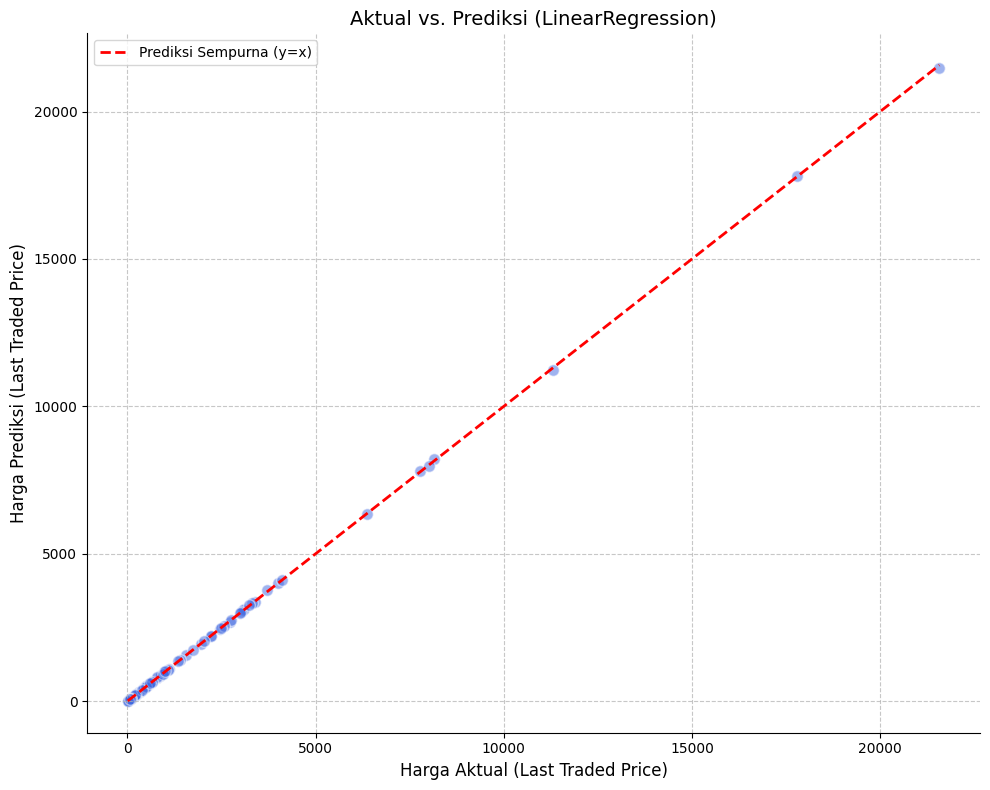

In [292]:
print(f"Visualisasi untuk Model Terbaik:")
if not model_performance_summary_df.empty:
    best_model_name = model_performance_summary_df.loc[model_performance_summary_df['rmse'].idxmin(), 'model']
    y_pred_best_model = model_predictions_on_test_set[best_model_name]

    print(f"Model terbaik (berdasarkan RMSE): {best_model_name}")

    # 1. Scatter Plot Aktual vs Prediksi dengan Garis y=x
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred_best_model, alpha=0.5, color='royalblue', edgecolors='w', s=70)

    min_val = min(y_test.min(), pd.Series(y_pred_best_model).min())
    max_val = max(y_test.max(), pd.Series(y_pred_best_model).max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, color='red', label='Prediksi Sempurna (y=x)')

    plt.xlabel(f"Harga Aktual ({target_col_name_for_plot})", fontsize=12)
    plt.ylabel(f"Harga Prediksi ({target_col_name_for_plot})", fontsize=12)
    plt.title(f'Aktual vs. Prediksi ({best_model_name})', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()
else:
    print("\nTidak ada data performa model untuk menentukan model terbaik dan divisualisasikan.")

Kode ini menampilkan visualisasi untuk model terbaik berdasarkan RMSE (Root Mean Squared Error). Model terbaik dipilih berdasarkan nilai RMSE terendah. Visualisasi yang ditampilkan adalah scatter plot yang membandingkan harga aktual (`y_test`) dengan harga prediksi dari model terbaik, dengan garis y=x sebagai referensi prediksi sempurna.

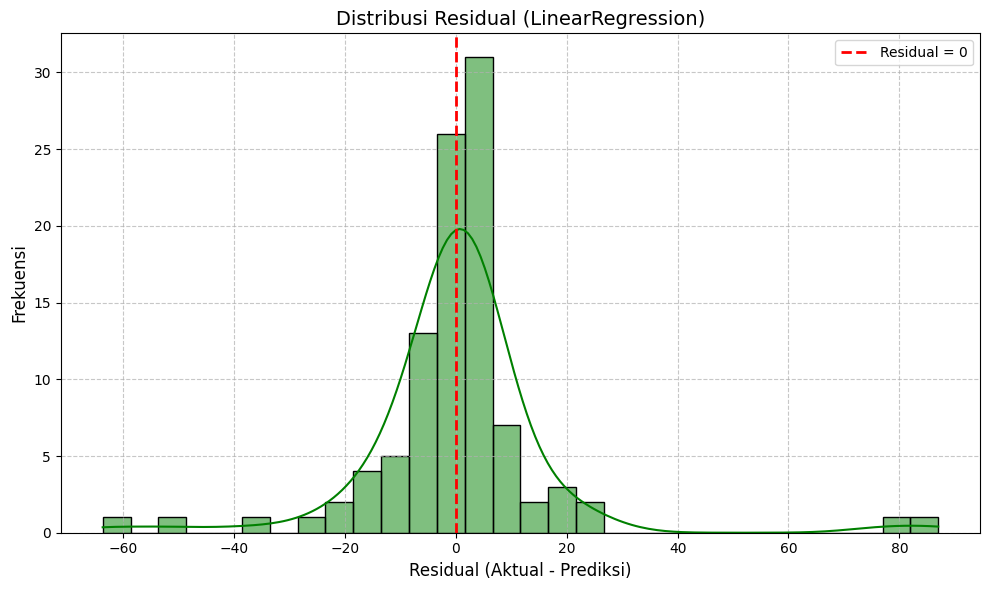


Statistik Residual untuk LinearRegression:
Mean Residual: 0.2768
Std Residual : 17.0459


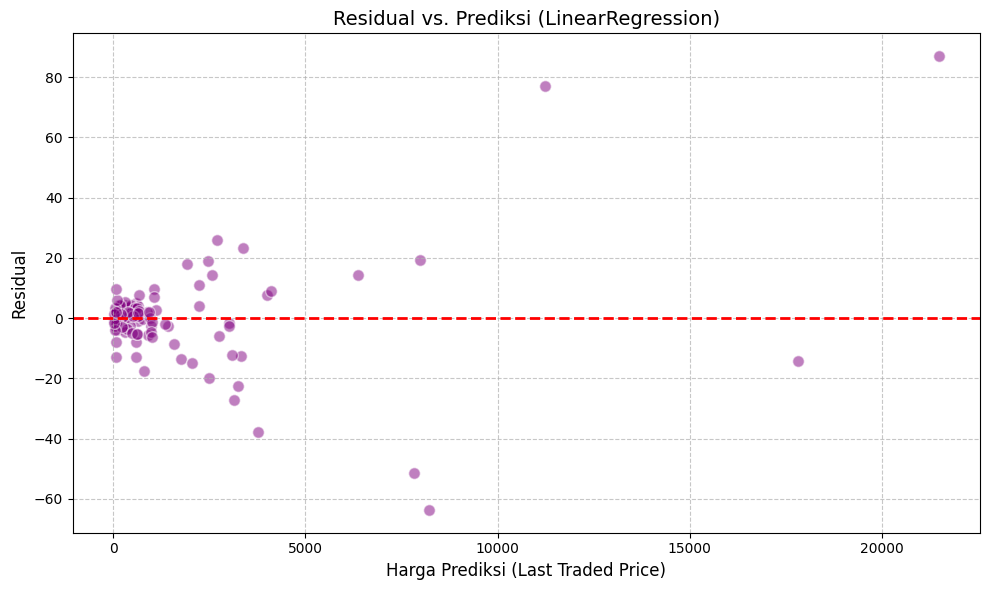

In [293]:
if not model_performance_summary_df.empty and 'best_model_name' in locals(): # Cek jika best_model_name sudah ada
    if 'y_pred_best_model' not in locals():
         y_pred_best_model = model_predictions_on_test_set[best_model_name]

    residuals = y_test.reset_index(drop=True) - pd.Series(y_pred_best_model).reset_index(drop=True) # Pastikan index selaras

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='green')
    plt.xlabel("Residual (Aktual - Prediksi)", fontsize=12)
    plt.ylabel("Frekuensi", fontsize=12)
    plt.title(f"Distribusi Residual ({best_model_name})", fontsize=14)
    plt.axvline(0, color='red', linestyle='--', lw=2, label='Residual = 0')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"\nStatistik Residual untuk {best_model_name}:")
    print(f"Mean Residual: {residuals.mean():.4f}")
    print(f"Std Residual : {residuals.std():.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_best_model, residuals, alpha=0.5, color='purple', edgecolors='w', s=70)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel(f"Harga Prediksi ({target_col_name_for_plot})", fontsize=12)
    plt.ylabel("Residual", fontsize=12)
    plt.title(f"Residual vs. Prediksi ({best_model_name})", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nLewati plot residual karena model terbaik belum ditentukan atau data performa kosong.")

Kode ini menampilkan dua visualisasi untuk analisis residual model terbaik: distribusi residual (histogram dengan garis KDE) dan scatter plot antara residual dan prediksi. Rata-rata dan deviasi standar residual juga ditampilkan.